In [3]:
import pandas as pd
import numpy as np
import descartes
import geopandas as gpd
from shapely.geometry import Polygon,Point
%matplotlib inline
from scipy import ndimage
import matplotlib.pyplot as plt
from os.path import join
import io

#read data and create dataframe
path_prefix = '../Agent-Map'
agent_df=pd.read_csv(join(path_prefix, "agent.csv"))
building_df=pd.read_csv(join(path_prefix, "building.csv"))

In [30]:
#Add geometry column containing coordinates
coordinates=[Point(xy)for xy in zip(building_df[" BuildingX"],building_df[" BuildingY"])]
building_df=gpd.GeoDataFrame(building_df, geometry=coordinates)

geometry=[Point(xy)for xy in zip(agent_df[" AgentX"],agent_df[" AgentY"])]
agent_df=gpd.GeoDataFrame(agent_df, geometry=geometry)

In [36]:
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

/Users/eylulsahin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


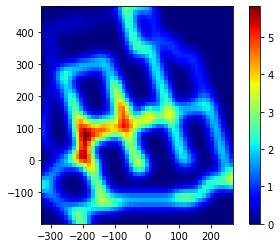

In [37]:
heatmap(agent_df, bins=50, smoothing=1.5)